In [1]:
import upsetplot
import pandas as pd
import pykrev as pk
import numpy as np
import seaborn as sns
from sklearn import decomposition
from matplotlib import pyplot as plt
import missingno as msno
from matplotlib.lines import Line2D
import math
import time
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches



In [2]:
#read the ordination data 
ordinationData = pd.read_csv("../ordination/333_ordination.csv",index_col=0)
#read the metadata
metaData = pd.read_csv("../metadata/333_metadata.csv",index_col=0)
#merge the data
mergeData = pd.merge(ordinationData,metaData.filter(['ID','Species group']),how='left',left_index=True,right_on='ID')
mergeData.drop(columns=["ID"], inplace=True)


In [3]:
# set of all formula belonging to each group to upset on 
# use susdat to produce molecular formulas and then use pykrev to calculate the chemometrics to display above
# {'Fish': (),'Other':(),'Bird':()}
# {}

In [4]:
#make a dictionary with a set of the unique compounds for each species group
groupDict = {}
for group in mergeData['Species group'].unique():
    print(group)
    if type(group) == float:
        if np.isnan(group):
            test = mergeData.loc[metaData['Species group'].isnull(),:]
        else:
            test = mergeData[mergeData['Species group'] == group]
    else:
        test = mergeData[mergeData['Species group'] == group]
    test = test.drop(columns=["Species group"])
    groupDict[group] = set(test.columns[test.sum(axis=0) > 0])


Fish (22486)
Other (22510)
Bird (22511)
nan


In [59]:
a = test.sum(axis=0).sort_values(ascending=False)[0:10]
set(a.keys()[a > 0])

{'NS00008811',
 'NS00014224',
 'NS00021506',
 'NS00051748',
 'NS00053093',
 'NS00056605',
 'NS00056967',
 'NS00068274',
 'NS00071557',
 'NS00103524'}

In [58]:
a

NS00071557    1.005406e+09
NS00014224    1.005406e+09
NS00008811    4.298894e+08
NS00056605    4.298894e+08
NS00056967    4.298894e+08
NS00103524    4.298894e+08
NS00021506    4.298894e+08
NS00051748    4.298894e+08
NS00053093    4.298894e+08
NS00068274    4.298894e+08
dtype: float64

/home/ezrkit/.local/lib/python3.9/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/home/ezrkit/.local/lib/python3.9/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

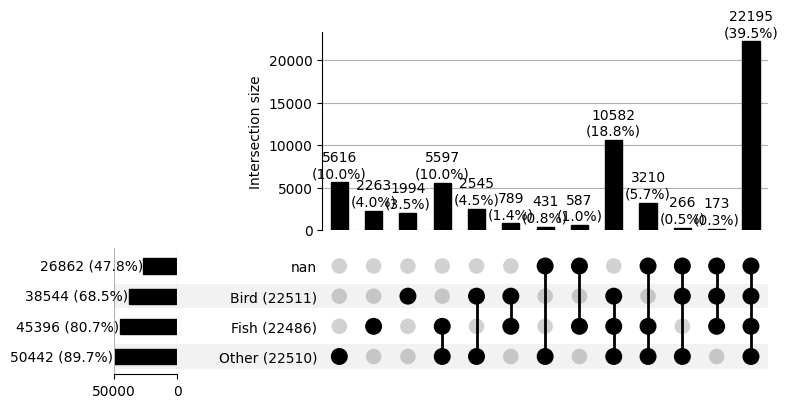

In [5]:
fromContents = upsetplot.from_contents(groupDict)
upset = upsetplot.UpSet(fromContents, show_counts=True, show_percentages = True)
upset.plot()

In [6]:
fromContents

id
Fish (22486) Other (22510) Bird (22511) nan              
True         True          True         True   NS00046843
                                        True   NS00016661
                                        True   NS00005555
                                        True   NS00044915
                                        True   NS00020487
...                                                   ...
False        False         True         False  NS00077247
                                        False  NS00057340
                                        False  NS00109732
                                        False  NS00040620
                                        False  NS00074643

[56248 rows x 1 columns]

In [7]:
test.sum(axis=0) > 0

NS00089894    False
NS00097320    False
NS00048518    False
NS00070313    False
NS00039803    False
              ...  
NS00001741     True
NS00014251    False
NS00096012    False
NS00006034     True
NS00064737     True
Length: 56248, dtype: bool

In [8]:
np.isnan(mergeData['Species group'].unique()[3])

True

In [9]:
metaData['Species group'][0]

nan

In [10]:
upsetplot(ordinationData

SyntaxError: unexpected EOF while parsing (3137552015.py, line 1)